# Clustering
Given the music preferences, do people make up any clusters of similar behavior?

In [52]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

FIGSIZE = (16, 9)

In [126]:
path = "../data/responses_cleaned.csv"
df = pd.read_csv(path, header=0)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


Let us extract the music features.

In [23]:
music_cols = [
    'Music', 'Slow songs or fast songs', 'Dance', 'Folk',
    'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
    'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
    'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
    'Techno, Trance', 'Opera'
]
df_music = df[music_cols]

print(df_music.shape)
print(df_music.columns)

(1010, 19)
Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera'],
      dtype='object')


We don't need to rescale the features as all of them are in the range [0, 5].

# Visualize

Let's visualize the rating counts of each music column.

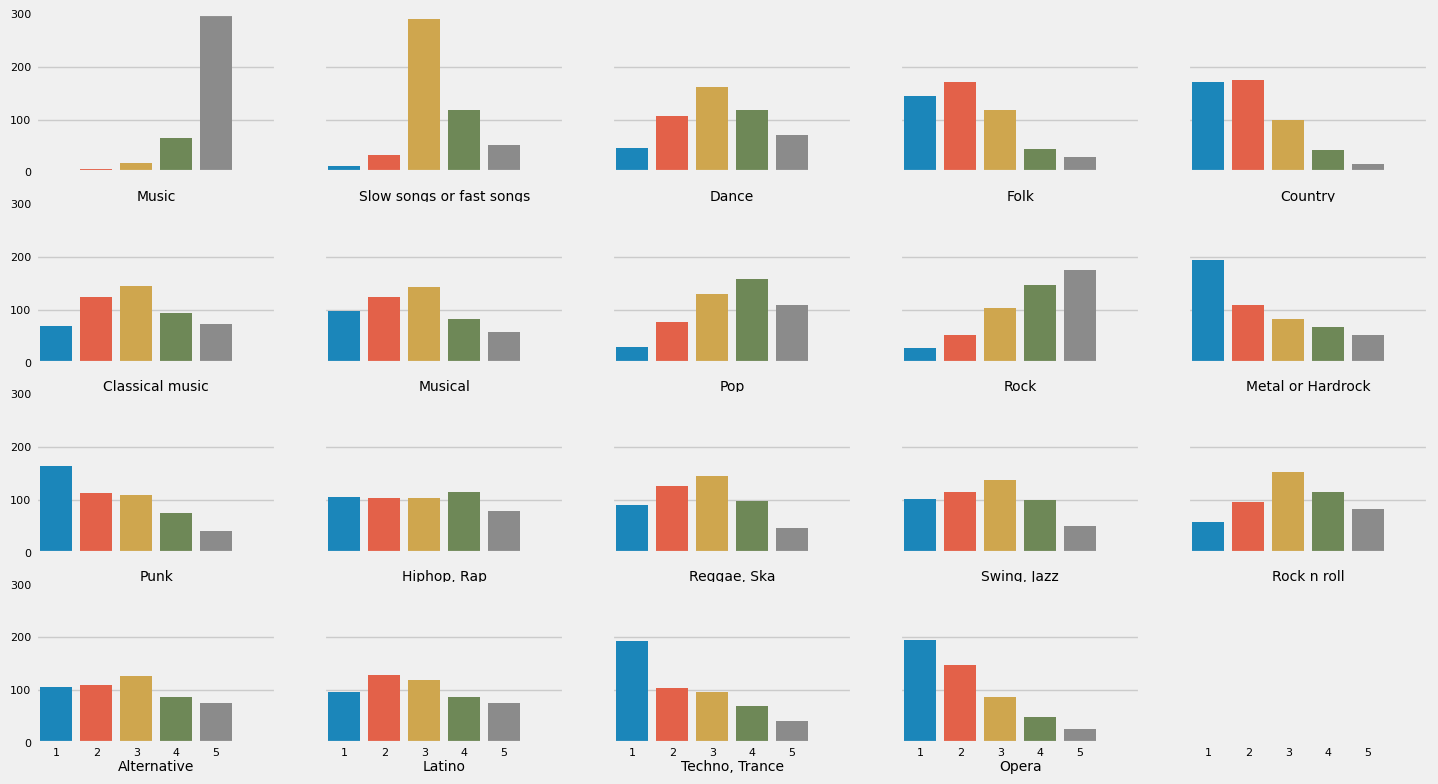

In [125]:
fig, ax = plt.subplots(4,5,figsize=FIGSIZE, sharex=True, sharey=True)
initial = 0
for i in range(4):
    for j in range(5):
        # Leave the last one blank.
        if i == 3 and j == 4:
            ax[i,j].grid(False)
            ax[i,j].set_xticklabels(labels=[1,2,3,4,5], fontsize=8)
            ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=8)
            continue
        sns.countplot(df_music, x=df_music.columns[initial], ax=ax[i,j])
        ax[i,j].set_title(df_music.columns[initial], y=-0.23, fontsize=10)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xticklabels(labels=[1,2,3,4,5], fontsize=8)
        ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=8)
        ax[i,j].set_xlim(-0.5, 5.5)
        ax[i,j].set_ylim(0,600)
        initial += 1

What insights can we draw from this:
- Everyone likes music!
- Most genres show a guassian behavior.
- Some genres are visibly popular: Pop, Rock.
- Some genres are visibly unpopular e.g., Folk, Country, Metal, Opera. Notably, these genres were quite popular in the previous generation.